<h3>Moje pokusy pro zasmani</h3>

INDICATOR
v OQT není možné použít bboxes
bpolys se buď nahraje z GeoJSON nebo se musí definovat přímo souřadnice.

U OQT nejde definovat okamzik, pro ktery se bude kvalita posuzovat. To mohu jedine tak, ze ziskam z daneho casu data z ohsome API a pak to predhodim OQT jako soucast dotazu.

viz: https://github.com/GIScience/ohsome-quality-analyst/blob/main/docs/api.md 
https://oqt.ohsome.org/api/docs#/indicator/post_indicator_indicator_post 

Data used in this example has been taken from the ohsome API response of following request URL: 
https://api.ohsome.org/v1/elements/count?bboxes=8.67%2C49.39%2C8.71%2C49.42&filter=building%3D*%20and%20geometry%3Apolygon&format=json&time=2014-01-01%2F2017-01-01%2FP1M 


Pozor nektere priklady dotazu z dokumentace OQT jsou zastarale. Napr. pouzivaji parametr topic misto layer.

In [ ]:
#Priklad, kde lze pouzit souradnice misto nahrani hranic z GeoJSON
import json

import requests
from IPython.display import SVG, display


base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

# OQT size restriction on the input geometry is 100 sqkm
#with open("italy-florence-quartier-5.geojson", "r") as file:
#    bpolys = json.load(file)

bpolys = {
    "type": "Feature",
    "geometry": {
      "type": "Polygon",
      "coordinates": [
        [
          [
            28.0510142,
            53.7208258
          ],
          [
            28.3693736,
            53.7078222
          ],
          [
            28.3913464,
            53.9189919
          ],
          [
            27.8972056,
            53.9946911
          ],
          [
            28.0510142,
            53.7208258
          ]
        ]
      ],
    }
}

parameters = {
    "name": "MappingSaturation",
    "layerKey": "poi",  
    "bpolys": bpolys,
    "flatten": False,
    "includeSvg": True,
}

for value in parameters.values():
    assert value != "", "Please provide values for the parameters"

response = requests.post(url, json=parameters)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

properties = response.json()["properties"]
result = properties["result"]
svg = result.pop("svg")

print("Properties: ")
print(properties)
print("")
print("Result: ")
print(json.dumps(result, indent=4))  # Pretty print response

display(SVG(svg))

Priklad vyse predelany tak, aby nebylo vse v parameters. 

In [ ]:
#Priklad, kam se nahravaji nejen souradnice, ale i vysledek dotazu z ohsome API
#https://api.ohsome.org/v1/elements/count?bboxes=8.67%2C49.39%2C8.71%2C49.42&filter=building%3D*%20and%20geometry%3Apolygon&format=json&time=2014-01-01%2F2017-01-01%2FP1M 

import json

import requests
from IPython.display import SVG, display

base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint


bpolys = {
    "type": "Feature",
    "geometry": {
      "type": "Polygon",
      "coordinates": [
        [
          [
            8.674092292785645,
            49.40427147224242
          ],
          [
            8.695850372314453,
            49.40427147224242
          ],
          [
            8.695850372314453,
            49.415552187316095
          ],
          [
            8.674092292785645,
            49.415552187316095
          ],
          [
            8.674092292785645,
            49.40427147224242
          ]
        ]
      ]
    }
}


layer = {
    "name": "My layer name",
    "description": "My layer description",
    "data": {
      "result": [
        {
          "timestamp": "2014-01-01T00:00:00Z",
          "value": 4708
        },
        {
          "timestamp": "2014-02-01T00:00:00Z",
          "value": 4842
        },
        {
          "timestamp": "2014-03-01T00:00:00Z",
          "value": 4840
        },
        {
          "timestamp": "2014-04-01T00:00:00Z",
          "value": 4941
        },
        {
          "timestamp": "2014-05-01T00:00:00Z",
          "value": 4987
        },
        {
          "timestamp": "2014-06-01T00:00:00Z",
          "value": 5007
        },
        {
          "timestamp": "2014-07-01T00:00:00Z",
          "value": 5020
        },
        {
          "timestamp": "2014-08-01T00:00:00Z",
          "value": 5168
        },
        {
          "timestamp": "2014-09-01T00:00:00Z",
          "value": 5355
        },
        {
          "timestamp": "2014-10-01T00:00:00Z",
          "value": 5394
        },
        {
          "timestamp": "2014-11-01T00:00:00Z",
          "value": 5449
        },
        {
          "timestamp": "2014-12-01T00:00:00Z",
          "value": 5470
        },
        {
          "timestamp": "2015-01-01T00:00:00Z",
          "value": 5475
        },
        {
          "timestamp": "2015-02-01T00:00:00Z",
          "value": 5477
        },
        {
          "timestamp": "2015-03-01T00:00:00Z",
          "value": 5481
        },
        {
          "timestamp": "2015-04-01T00:00:00Z",
          "value": 5495
        },
        {
          "timestamp": "2015-05-01T00:00:00Z",
          "value": 5516
        },
        {
          "timestamp": "2015-06-01T00:00:00Z",
          "value": 5517
        },
        {
          "timestamp": "2015-07-01T00:00:00Z",
          "value": 5519
        },
        {
          "timestamp": "2015-08-01T00:00:00Z",
          "value": 5525
        },
        {
          "timestamp": "2015-09-01T00:00:00Z",
          "value": 5560
        },
        {
          "timestamp": "2015-10-01T00:00:00Z",
          "value": 5564
        },
        {
          "timestamp": "2015-11-01T00:00:00Z",
          "value": 5568
        },
        {
          "timestamp": "2015-12-01T00:00:00Z",
          "value": 5627
        },
        {
          "timestamp": "2016-01-01T00:00:00Z",
          "value": 5643
        },
        {
          "timestamp": "2016-02-01T00:00:00Z",
          "value": 5680
        },
        {
          "timestamp": "2016-03-01T00:00:00Z",
          "value": 5681
        },
        {
          "timestamp": "2016-04-01T00:00:00Z",
          "value": 5828
        },
        {
          "timestamp": "2016-05-01T00:00:00Z",
          "value": 5974
        },
        {
          "timestamp": "2016-06-01T00:00:00Z",
          "value": 5990
        },
        {
          "timestamp": "2016-07-01T00:00:00Z",
          "value": 5991
        },
        {
          "timestamp": "2016-08-01T00:00:00Z",
          "value": 5997
        },
        {
          "timestamp": "2016-09-01T00:00:00Z",
          "value": 6002
        },
        {
          "timestamp": "2016-10-01T00:00:00Z",
          "value": 6010
        },
        {
          "timestamp": "2016-11-01T00:00:00Z",
          "value": 6010
        },
        {
          "timestamp": "2016-12-01T00:00:00Z",
          "value": 6016
        },
        {
          "timestamp": "2017-01-01T00:00:00Z",
          "value": 6015
        }
      ]
    }
}    



parameters = {
  "name": "MappingSaturation",
  "bpolys": bpolys,
  "layer": layer,
  "includeSvg": True,
  "includeHtml": False,
  "flatten": False
}

response = requests.post(url, json=parameters)

response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200
print(response.json())

properties = response.json()["properties"]
result = properties["result"]
svg = result.pop("svg")

print("Properties: ")
print(properties)
print("")
print("Result: ")
print(json.dumps(result, indent=4))  # Pretty print response

display(SVG(svg))


<H2>How to ask OQT about data quality in the past</H2>
<H3>ohsome + OQT, 2017-2019</H3>
<p>1. Query to the Ohsome API to get the state of mapping saturation of buildings in the Minsk region for 3 years before AI existence: January 2017-January 2020. I think 37 values should be entered, not 36. RapiD 1.0.0 was created at the end of 2019.</p>
<p>LayerKey building_count is defined in the reports: All buildings as defined by all objects tagged with 'building=* </p>
<p>Mapping Saturation is defined in the reports: The saturation of the last 3 years... </p> 

In [ ]:
#Query Ohsome API to get 3 year status before AI: Jan 2017 - Jan 2020

import json

from datetime import datetime

import requests


base_url = "https://api.ohsome.org/v1"
endpoint = "/elements/count"
url = base_url + endpoint

#with open("xxx.geojson", "r") as file:
#    bpolys = json.load(file)

parameters = {
    #"bpolys": json.dumps(bpolys),  # pass GeoJSON as string.
    # OR:
    "bboxes": "28.0,53.7,28.3,54.0",
    "filter": "building=*",
    "format": "json",
    "time": "2017-01-01/2020-01-01/P1M",
}
headers = {
    "accept": "application/json",
    "Content-Type": "application/x-www-form-urlencoded",
}

for value in parameters.values():
    assert value != "", "Please provide values for the parameters"
    
response = requests.post(url, data=parameters, headers=headers)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

print("Response:")
print(json.dumps(response.json(), indent=4))  # Pretty print response

result = response.json()["result"]


<p>1b. Query on OQT, into which the result from the ohsome API above from the years 2017-2020 is inserted. Building saturation was 79.07% percent.</p>

In [ ]:
import json

import requests
from IPython.display import SVG, display

base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

bpolys = {
    "type": "Feature",
    "geometry": {
      "type": "Polygon",
      "coordinates": [
        [
          [
            28.0,
            53.7
          ],
          [
            28.3,
            53.7
          ],
          [
            28.3,
            54.0
          ],
          [
            28.0,
            54.0
          ],
          [
            28.0,
            53.7
          ]
        ]
      ]
    }
}


layer = {
    "name": "buildings Minsk 2017-2019",
    "description": "buildings Minsk 2017-2019",
    "data": {
      "result": [
        {
            "timestamp": "2017-01-01T00:00:00Z",
            "value": 6212.0
        },
        {
            "timestamp": "2017-02-01T00:00:00Z",
            "value": 7656.0
        },
        {
            "timestamp": "2017-03-01T00:00:00Z",
            "value": 7670.0
        },
        {
            "timestamp": "2017-04-01T00:00:00Z",
            "value": 7726.0
        },
        {
            "timestamp": "2017-05-01T00:00:00Z",
            "value": 8150.0
        },
        {
            "timestamp": "2017-06-01T00:00:00Z",
            "value": 8152.0
        },
        {
            "timestamp": "2017-07-01T00:00:00Z",
            "value": 8625.0
        },
        {
            "timestamp": "2017-08-01T00:00:00Z",
            "value": 8625.0
        },
        {
            "timestamp": "2017-09-01T00:00:00Z",
            "value": 8627.0
        },
        {
            "timestamp": "2017-10-01T00:00:00Z",
            "value": 8637.0
        },
        {
            "timestamp": "2017-11-01T00:00:00Z",
            "value": 8639.0
        },
        {
            "timestamp": "2017-12-01T00:00:00Z",
            "value": 8642.0
        },
        {
            "timestamp": "2018-01-01T00:00:00Z",
            "value": 8643.0
        },
        {
            "timestamp": "2018-02-01T00:00:00Z",
            "value": 8645.0
        },
        {
            "timestamp": "2018-03-01T00:00:00Z",
            "value": 8645.0
        },
        {
            "timestamp": "2018-04-01T00:00:00Z",
            "value": 8646.0
        },
        {
            "timestamp": "2018-05-01T00:00:00Z",
            "value": 8950.0
        },
        {
            "timestamp": "2018-06-01T00:00:00Z",
            "value": 9030.0
        },
        {
            "timestamp": "2018-07-01T00:00:00Z",
            "value": 9038.0
        },
        {
            "timestamp": "2018-08-01T00:00:00Z",
            "value": 9040.0
        },
        {
            "timestamp": "2018-09-01T00:00:00Z",
            "value": 9058.0
        },
        {
            "timestamp": "2018-10-01T00:00:00Z",
            "value": 9092.0
        },
        {
            "timestamp": "2018-11-01T00:00:00Z",
            "value": 9093.0
        },
        {
            "timestamp": "2018-12-01T00:00:00Z",
            "value": 9093.0
        },
        {
            "timestamp": "2019-01-01T00:00:00Z",
            "value": 9093.0
        },
        {
            "timestamp": "2019-02-01T00:00:00Z",
            "value": 9102.0
        },
        {
            "timestamp": "2019-03-01T00:00:00Z",
            "value": 9102.0
        },
        {
            "timestamp": "2019-04-01T00:00:00Z",
            "value": 9102.0
        },
        {
            "timestamp": "2019-05-01T00:00:00Z",
            "value": 9119.0
        },
        {
            "timestamp": "2019-06-01T00:00:00Z",
            "value": 9121.0
        },
        {
            "timestamp": "2019-07-01T00:00:00Z",
            "value": 9124.0
        },
        {
            "timestamp": "2019-08-01T00:00:00Z",
            "value": 9145.0
        },
        {
            "timestamp": "2019-09-01T00:00:00Z",
            "value": 9148.0
        },
        {
            "timestamp": "2019-10-01T00:00:00Z",
            "value": 9153.0
        },
        {
            "timestamp": "2019-11-01T00:00:00Z",
            "value": 9152.0
        },
        {
            "timestamp": "2019-12-01T00:00:00Z",
            "value": 9152.0
        },
        {
            "timestamp": "2020-01-01T00:00:00Z",
            "value": 9154.0
        }
      ]
    }
}    

parameters = {
  "name": "MappingSaturation",
  "bpolys": bpolys,
  "layer": layer,
  "includeSvg": True,
  "includeHtml": False,
  "flatten": False
}

response = requests.post(url, json=parameters)

response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200
print(response.json())

properties = response.json()["properties"]
result = properties["result"]
svg = result.pop("svg")

print("Properties: ")
print(properties)
print("")
print("Result: ")
print(json.dumps(result, indent=4))  # Pretty print response

display(SVG(svg))


<h3>OQT, ...-2024</h3>
<p>2. Query on OQT, from the latest era 2019.</p>
<p>If I want to use an existing indicator and do not want to insert my own data, then layerKey is used. If I want to insert my own data, then layer is used.</p>
<p>Saturation is 94 percent.</p>
<h3>Definition of saturation: The saturation of the last 3 years... But SVG chart shows years 2008-2024.</h3>

In [ ]:
import json

import requests
from IPython.display import SVG, display

base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

bpolys = {
    "type": "Feature",
    "geometry": {
      "type": "Polygon",
      "coordinates": [
        [
          [
            28.0,
            53.7
          ],
          [
            28.3,
            53.7
          ],
          [
            28.3,
            54.0
          ],
          [
            28.0,
            54.0
          ],
          [
            28.0,
            53.7
          ]
        ]
      ]
    }
}

parameters = {
  "name": "MappingSaturation",
  "bpolys": bpolys,
  "layerKey": "building_count",
  "includeSvg": True,
  "includeHtml": False,
  "flatten": False
}

response = requests.post(url, json=parameters)

response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200
print(response.json())

properties = response.json()["properties"]
result = properties["result"]
svg = result.pop("svg")

print("Properties: ")
print(properties)
print("")
print("Result: ")
print(json.dumps(result, indent=4))  # Pretty print response

display(SVG(svg))

<H3>ohsome + OQT, March 2020 - April 2023</H3>
<p>3a. Checking if query 3 will have the same result if I get the data from ohsome by myself. #Query Ohsome API to get last 3 years status: March 2020 - April 2023.</p>

In [ ]:
#Query Ohsome API to get last 3 years status: March 2020 - April 2023

import json

from datetime import datetime

import requests


base_url = "https://api.ohsome.org/v1"
endpoint = "/elements/count"
url = base_url + endpoint

#with open("xxx.geojson", "r") as file:
#    bpolys = json.load(file)

parameters = {
    #"bpolys": json.dumps(bpolys),  # pass GeoJSON as string.
    # OR:
    "bboxes": "28.0,53.7,28.3,54.0",
    "filter": "building=*",
    "format": "json",
    "time": "2020-03-01/2023-04-01/P1M",
}
headers = {
    "accept": "application/json",
    "Content-Type": "application/x-www-form-urlencoded",
}

for value in parameters.values():
    assert value != "", "Please provide values for the parameters"
    
response = requests.post(url, data=parameters, headers=headers)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

print("Response:")
print(json.dumps(response.json(), indent=4))  # Pretty print response

result = response.json()["result"]


<p>3b. Query on OQT, into which the result from the ohsome API above is inserted from the years 2020-2023. </p>
<p>The saturation of the last 3 years is 79.43%?! Like 3 years ago?</p>

In [ ]:
import json

import requests
from IPython.display import SVG, display

base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

bpolys = {
    "type": "Feature",
    "geometry": {
      "type": "Polygon",
      "coordinates": [
        [
          [
            28.0,
            53.7
          ],
          [
            28.3,
            53.7
          ],
          [
            28.3,
            54.0
          ],
          [
            28.0,
            54.0
          ],
          [
            28.0,
            53.7
          ]
        ]
      ]
    }
}


layer = {
    "name": "buildings Minsk 2017-2019",
    "description": "buildings Minsk 2017-2019",
    "data": {
      "result": [
        {
            "timestamp": "2020-03-01T00:00:00Z",
            "value": 9155.0
        },
        {
            "timestamp": "2020-04-01T00:00:00Z",
            "value": 9155.0
        },
        {
            "timestamp": "2020-05-01T00:00:00Z",
            "value": 9189.0
        },
        {
            "timestamp": "2020-06-01T00:00:00Z",
            "value": 9183.0
        },
        {
            "timestamp": "2020-07-01T00:00:00Z",
            "value": 9185.0
        },
        {
            "timestamp": "2020-08-01T00:00:00Z",
            "value": 9190.0
        },
        {
            "timestamp": "2020-09-01T00:00:00Z",
            "value": 9767.0
        },
        {
            "timestamp": "2020-10-01T00:00:00Z",
            "value": 9775.0
        },
        {
            "timestamp": "2020-11-01T00:00:00Z",
            "value": 9956.0
        },
        {
            "timestamp": "2020-12-01T00:00:00Z",
            "value": 10302.0
        },
        {
            "timestamp": "2021-01-01T00:00:00Z",
            "value": 10302.0
        },
        {
            "timestamp": "2021-02-01T00:00:00Z",
            "value": 10859.0
        },
        {
            "timestamp": "2021-03-01T00:00:00Z",
            "value": 11351.0
        },
        {
            "timestamp": "2021-04-01T00:00:00Z",
            "value": 11355.0
        },
        {
            "timestamp": "2021-05-01T00:00:00Z",
            "value": 11356.0
        },
        {
            "timestamp": "2021-06-01T00:00:00Z",
            "value": 11463.0
        },
        {
            "timestamp": "2021-07-01T00:00:00Z",
            "value": 11464.0
        },
        {
            "timestamp": "2021-08-01T00:00:00Z",
            "value": 11478.0
        },
        {
            "timestamp": "2021-09-01T00:00:00Z",
            "value": 11478.0
        },
        {
            "timestamp": "2021-10-01T00:00:00Z",
            "value": 11486.0
        },
        {
            "timestamp": "2021-11-01T00:00:00Z",
            "value": 11486.0
        },
        {
            "timestamp": "2021-12-01T00:00:00Z",
            "value": 11499.0
        },
        {
            "timestamp": "2022-01-01T00:00:00Z",
            "value": 11508.0
        },
        {
            "timestamp": "2022-02-01T00:00:00Z",
            "value": 11505.0
        },
        {
            "timestamp": "2022-03-01T00:00:00Z",
            "value": 11505.0
        },
        {
            "timestamp": "2022-04-01T00:00:00Z",
            "value": 11505.0
        },
        {
            "timestamp": "2022-05-01T00:00:00Z",
            "value": 11537.0
        },
        {
            "timestamp": "2022-06-01T00:00:00Z",
            "value": 11540.0
        },
        {
            "timestamp": "2022-07-01T00:00:00Z",
            "value": 11541.0
        },
        {
            "timestamp": "2022-08-01T00:00:00Z",
            "value": 11547.0
        },
        {
            "timestamp": "2022-09-01T00:00:00Z",
            "value": 11557.0
        },
        {
            "timestamp": "2022-10-01T00:00:00Z",
            "value": 11571.0
        },
        {
            "timestamp": "2022-11-01T00:00:00Z",
            "value": 11571.0
        },
        {
            "timestamp": "2022-12-01T00:00:00Z",
            "value": 11571.0
        },
        {
            "timestamp": "2023-01-01T00:00:00Z",
            "value": 11583.0
        },
        {
            "timestamp": "2023-02-01T00:00:00Z",
            "value": 11601.0
        },
        {
            "timestamp": "2023-03-01T00:00:00Z",
            "value": 11615.0
        },
        {
            "timestamp": "2023-04-01T00:00:00Z",
            "value": 11615.0
        }
      ]
    }
}    

parameters = {
  "name": "MappingSaturation",
  "bpolys": bpolys,
  "layer": layer,
  "includeSvg": True,
  "includeHtml": False,
  "flatten": False
}

response = requests.post(url, json=parameters)

response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200
print(response.json())

properties = response.json()["properties"]
result = properties["result"]
svg = result.pop("svg")

print("Properties: ")
print(properties)
print("")
print("Result: ")
print(json.dumps(result, indent=4))  # Pretty print response

display(SVG(svg))

<H3>ohsome + OQT, ... - April 2023</H3>
<p>4. What about all data till 2023? Will be the results the same as in OQT alone?</p>
<p>Saturation is 94 percent. Curve is contructed from all years, not only from last three years. Only numbers about saturation are from the last three years.</p>
<H3>So, it is important for historical analysis (ohsome + OQT) to extract all data from start of OSM to the right moment of history.</H3> 

In [ ]:
import json

from datetime import datetime

import requests


base_url = "https://api.ohsome.org/v1"
endpoint = "/elements/count"
url = base_url + endpoint

#with open("xxx.geojson", "r") as file:
#    bpolys = json.load(file)

parameters = {
    #"bpolys": json.dumps(bpolys),  # pass GeoJSON as string.
    # OR:
    "bboxes": "28.0,53.7,28.3,54.0",
    "filter": "building=*",
    "format": "json",
    "time": "/2023-04-01/P1M",
}
headers = {
    "accept": "application/json",
    "Content-Type": "application/x-www-form-urlencoded",
}

for value in parameters.values():
    assert value != "", "Please provide values for the parameters"
    
response = requests.post(url, data=parameters, headers=headers)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

print("Response:")
print(json.dumps(response.json(), indent=4))  # Pretty print response

result = response.json()["result"]

4b

In [ ]:
import json

import requests
from IPython.display import SVG, display

base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

bpolys = {
    "type": "Feature",
    "geometry": {
      "type": "Polygon",
      "coordinates": [
        [
          [
            28.0,
            53.7
          ],
          [
            28.3,
            53.7
          ],
          [
            28.3,
            54.0
          ],
          [
            28.0,
            54.0
          ],
          [
            28.0,
            53.7
          ]
        ]
      ]
    }
}


layer = {
    "name": "buildings Minsk until 2019",
    "description": "buildings Minsk until 2019",
    "data": {
          
    "result": [
        {
            "timestamp": "2007-10-08T00:00:00Z",
            "value": 0.0
        },
        {
            "timestamp": "2007-11-08T00:00:00Z",
            "value": 0.0
        },
        {
            "timestamp": "2007-12-08T00:00:00Z",
            "value": 0.0
        },
        {
            "timestamp": "2008-01-08T00:00:00Z",
            "value": 0.0
        },
        {
            "timestamp": "2008-02-08T00:00:00Z",
            "value": 0.0
        },
        {
            "timestamp": "2008-03-08T00:00:00Z",
            "value": 0.0
        },
        {
            "timestamp": "2008-04-08T00:00:00Z",
            "value": 0.0
        },
        {
            "timestamp": "2008-05-08T00:00:00Z",
            "value": 0.0
        },
        {
            "timestamp": "2008-06-08T00:00:00Z",
            "value": 0.0
        },
        {
            "timestamp": "2008-07-08T00:00:00Z",
            "value": 0.0
        },
        {
            "timestamp": "2008-08-08T00:00:00Z",
            "value": 0.0
        },
        {
            "timestamp": "2008-09-08T00:00:00Z",
            "value": 13.0
        },
        {
            "timestamp": "2008-10-08T00:00:00Z",
            "value": 13.0
        },
        {
            "timestamp": "2008-11-08T00:00:00Z",
            "value": 13.0
        },
        {
            "timestamp": "2008-12-08T00:00:00Z",
            "value": 13.0
        },
        {
            "timestamp": "2009-01-08T00:00:00Z",
            "value": 13.0
        },
        {
            "timestamp": "2009-02-08T00:00:00Z",
            "value": 13.0
        },
        {
            "timestamp": "2009-03-08T00:00:00Z",
            "value": 14.0
        },
        {
            "timestamp": "2009-04-08T00:00:00Z",
            "value": 14.0
        },
        {
            "timestamp": "2009-05-08T00:00:00Z",
            "value": 65.0
        },
        {
            "timestamp": "2009-06-08T00:00:00Z",
            "value": 65.0
        },
        {
            "timestamp": "2009-07-08T00:00:00Z",
            "value": 65.0
        },
        {
            "timestamp": "2009-08-08T00:00:00Z",
            "value": 73.0
        },
        {
            "timestamp": "2009-09-08T00:00:00Z",
            "value": 74.0
        },
        {
            "timestamp": "2009-10-08T00:00:00Z",
            "value": 74.0
        },
        {
            "timestamp": "2009-11-08T00:00:00Z",
            "value": 91.0
        },
        {
            "timestamp": "2009-12-08T00:00:00Z",
            "value": 91.0
        },
        {
            "timestamp": "2010-01-08T00:00:00Z",
            "value": 91.0
        },
        {
            "timestamp": "2010-02-08T00:00:00Z",
            "value": 91.0
        },
        {
            "timestamp": "2010-03-08T00:00:00Z",
            "value": 91.0
        },
        {
            "timestamp": "2010-04-08T00:00:00Z",
            "value": 91.0
        },
        {
            "timestamp": "2010-05-08T00:00:00Z",
            "value": 91.0
        },
        {
            "timestamp": "2010-06-08T00:00:00Z",
            "value": 92.0
        },
        {
            "timestamp": "2010-07-08T00:00:00Z",
            "value": 92.0
        },
        {
            "timestamp": "2010-08-08T00:00:00Z",
            "value": 213.0
        },
        {
            "timestamp": "2010-09-08T00:00:00Z",
            "value": 213.0
        },
        {
            "timestamp": "2010-10-08T00:00:00Z",
            "value": 213.0
        },
        {
            "timestamp": "2010-11-08T00:00:00Z",
            "value": 213.0
        },
        {
            "timestamp": "2010-12-08T00:00:00Z",
            "value": 213.0
        },
        {
            "timestamp": "2011-01-08T00:00:00Z",
            "value": 213.0
        },
        {
            "timestamp": "2011-02-08T00:00:00Z",
            "value": 213.0
        },
        {
            "timestamp": "2011-03-08T00:00:00Z",
            "value": 213.0
        },
        {
            "timestamp": "2011-04-08T00:00:00Z",
            "value": 213.0
        },
        {
            "timestamp": "2011-05-08T00:00:00Z",
            "value": 214.0
        },
        {
            "timestamp": "2011-06-08T00:00:00Z",
            "value": 214.0
        },
        {
            "timestamp": "2011-07-08T00:00:00Z",
            "value": 216.0
        },
        {
            "timestamp": "2011-08-08T00:00:00Z",
            "value": 216.0
        },
        {
            "timestamp": "2011-09-08T00:00:00Z",
            "value": 216.0
        },
        {
            "timestamp": "2011-10-08T00:00:00Z",
            "value": 217.0
        },
        {
            "timestamp": "2011-11-08T00:00:00Z",
            "value": 217.0
        },
        {
            "timestamp": "2011-12-08T00:00:00Z",
            "value": 217.0
        },
        {
            "timestamp": "2012-01-08T00:00:00Z",
            "value": 217.0
        },
        {
            "timestamp": "2012-02-08T00:00:00Z",
            "value": 217.0
        },
        {
            "timestamp": "2012-03-08T00:00:00Z",
            "value": 221.0
        },
        {
            "timestamp": "2012-04-08T00:00:00Z",
            "value": 221.0
        },
        {
            "timestamp": "2012-05-08T00:00:00Z",
            "value": 221.0
        },
        {
            "timestamp": "2012-06-08T00:00:00Z",
            "value": 221.0
        },
        {
            "timestamp": "2012-07-08T00:00:00Z",
            "value": 226.0
        },
        {
            "timestamp": "2012-08-08T00:00:00Z",
            "value": 226.0
        },
        {
            "timestamp": "2012-09-08T00:00:00Z",
            "value": 227.0
        },
        {
            "timestamp": "2012-10-08T00:00:00Z",
            "value": 1296.0
        },
        {
            "timestamp": "2012-11-08T00:00:00Z",
            "value": 1297.0
        },
        {
            "timestamp": "2012-12-08T00:00:00Z",
            "value": 1297.0
        },
        {
            "timestamp": "2013-01-08T00:00:00Z",
            "value": 1300.0
        },
        {
            "timestamp": "2013-02-08T00:00:00Z",
            "value": 1335.0
        },
        {
            "timestamp": "2013-03-08T00:00:00Z",
            "value": 1335.0
        },
        {
            "timestamp": "2013-04-08T00:00:00Z",
            "value": 1335.0
        },
        {
            "timestamp": "2013-05-08T00:00:00Z",
            "value": 1340.0
        },
        {
            "timestamp": "2013-06-08T00:00:00Z",
            "value": 1490.0
        },
        {
            "timestamp": "2013-07-08T00:00:00Z",
            "value": 1490.0
        },
        {
            "timestamp": "2013-08-08T00:00:00Z",
            "value": 1490.0
        },
        {
            "timestamp": "2013-09-08T00:00:00Z",
            "value": 1529.0
        },
        {
            "timestamp": "2013-10-08T00:00:00Z",
            "value": 1588.0
        },
        {
            "timestamp": "2013-11-08T00:00:00Z",
            "value": 1590.0
        },
        {
            "timestamp": "2013-12-08T00:00:00Z",
            "value": 1594.0
        },
        {
            "timestamp": "2014-01-08T00:00:00Z",
            "value": 1594.0
        },
        {
            "timestamp": "2014-02-08T00:00:00Z",
            "value": 1596.0
        },
        {
            "timestamp": "2014-03-08T00:00:00Z",
            "value": 1599.0
        },
        {
            "timestamp": "2014-04-08T00:00:00Z",
            "value": 1599.0
        },
        {
            "timestamp": "2014-05-08T00:00:00Z",
            "value": 1672.0
        },
        {
            "timestamp": "2014-06-08T00:00:00Z",
            "value": 1672.0
        },
        {
            "timestamp": "2014-07-08T00:00:00Z",
            "value": 1674.0
        },
        {
            "timestamp": "2014-08-08T00:00:00Z",
            "value": 1675.0
        },
        {
            "timestamp": "2014-09-08T00:00:00Z",
            "value": 1676.0
        },
        {
            "timestamp": "2014-10-08T00:00:00Z",
            "value": 1677.0
        },
        {
            "timestamp": "2014-11-08T00:00:00Z",
            "value": 1677.0
        },
        {
            "timestamp": "2014-12-08T00:00:00Z",
            "value": 1725.0
        },
        {
            "timestamp": "2015-01-08T00:00:00Z",
            "value": 1756.0
        },
        {
            "timestamp": "2015-02-08T00:00:00Z",
            "value": 1757.0
        },
        {
            "timestamp": "2015-03-08T00:00:00Z",
            "value": 1758.0
        },
        {
            "timestamp": "2015-04-08T00:00:00Z",
            "value": 1774.0
        },
        {
            "timestamp": "2015-05-08T00:00:00Z",
            "value": 1782.0
        },
        {
            "timestamp": "2015-06-08T00:00:00Z",
            "value": 2109.0
        },
        {
            "timestamp": "2015-07-08T00:00:00Z",
            "value": 2195.0
        },
        {
            "timestamp": "2015-08-08T00:00:00Z",
            "value": 2209.0
        },
        {
            "timestamp": "2015-09-08T00:00:00Z",
            "value": 2214.0
        },
        {
            "timestamp": "2015-10-08T00:00:00Z",
            "value": 2486.0
        },
        {
            "timestamp": "2015-11-08T00:00:00Z",
            "value": 2679.0
        },
        {
            "timestamp": "2015-12-08T00:00:00Z",
            "value": 3255.0
        },
        {
            "timestamp": "2016-01-08T00:00:00Z",
            "value": 3458.0
        },
        {
            "timestamp": "2016-02-08T00:00:00Z",
            "value": 4108.0
        },
        {
            "timestamp": "2016-03-08T00:00:00Z",
            "value": 4168.0
        },
        {
            "timestamp": "2016-04-08T00:00:00Z",
            "value": 4365.0
        },
        {
            "timestamp": "2016-05-08T00:00:00Z",
            "value": 4366.0
        },
        {
            "timestamp": "2016-06-08T00:00:00Z",
            "value": 4471.0
        },
        {
            "timestamp": "2016-07-08T00:00:00Z",
            "value": 4471.0
        },
        {
            "timestamp": "2016-08-08T00:00:00Z",
            "value": 4472.0
        },
        {
            "timestamp": "2016-09-08T00:00:00Z",
            "value": 5128.0
        },
        {
            "timestamp": "2016-10-08T00:00:00Z",
            "value": 5517.0
        },
        {
            "timestamp": "2016-11-08T00:00:00Z",
            "value": 5522.0
        },
        {
            "timestamp": "2016-12-08T00:00:00Z",
            "value": 6143.0
        },
        {
            "timestamp": "2017-01-08T00:00:00Z",
            "value": 6920.0
        },
        {
            "timestamp": "2017-02-08T00:00:00Z",
            "value": 7656.0
        },
        {
            "timestamp": "2017-03-08T00:00:00Z",
            "value": 7726.0
        },
        {
            "timestamp": "2017-04-08T00:00:00Z",
            "value": 7726.0
        },
        {
            "timestamp": "2017-05-08T00:00:00Z",
            "value": 8150.0
        },
        {
            "timestamp": "2017-06-08T00:00:00Z",
            "value": 8152.0
        },
        {
            "timestamp": "2017-07-08T00:00:00Z",
            "value": 8625.0
        },
        {
            "timestamp": "2017-08-08T00:00:00Z",
            "value": 8627.0
        },
        {
            "timestamp": "2017-09-08T00:00:00Z",
            "value": 8629.0
        },
        {
            "timestamp": "2017-10-08T00:00:00Z",
            "value": 8637.0
        },
        {
            "timestamp": "2017-11-08T00:00:00Z",
            "value": 8639.0
        },
        {
            "timestamp": "2017-12-08T00:00:00Z",
            "value": 8642.0
        },
        {
            "timestamp": "2018-01-08T00:00:00Z",
            "value": 8643.0
        },
        {
            "timestamp": "2018-02-08T00:00:00Z",
            "value": 8645.0
        },
        {
            "timestamp": "2018-03-08T00:00:00Z",
            "value": 8645.0
        },
        {
            "timestamp": "2018-04-08T00:00:00Z",
            "value": 8656.0
        },
        {
            "timestamp": "2018-05-08T00:00:00Z",
            "value": 8993.0
        },
        {
            "timestamp": "2018-06-08T00:00:00Z",
            "value": 9036.0
        },
        {
            "timestamp": "2018-07-08T00:00:00Z",
            "value": 9038.0
        },
        {
            "timestamp": "2018-08-08T00:00:00Z",
            "value": 9040.0
        },
        {
            "timestamp": "2018-09-08T00:00:00Z",
            "value": 9058.0
        },
        {
            "timestamp": "2018-10-08T00:00:00Z",
            "value": 9093.0
        },
        {
            "timestamp": "2018-11-08T00:00:00Z",
            "value": 9093.0
        },
        {
            "timestamp": "2018-12-08T00:00:00Z",
            "value": 9093.0
        },
        {
            "timestamp": "2019-01-08T00:00:00Z",
            "value": 9093.0
        },
        {
            "timestamp": "2019-02-08T00:00:00Z",
            "value": 9102.0
        },
        {
            "timestamp": "2019-03-08T00:00:00Z",
            "value": 9102.0
        },
        {
            "timestamp": "2019-04-08T00:00:00Z",
            "value": 9119.0
        },
        {
            "timestamp": "2019-05-08T00:00:00Z",
            "value": 9121.0
        },
        {
            "timestamp": "2019-06-08T00:00:00Z",
            "value": 9125.0
        },
        {
            "timestamp": "2019-07-08T00:00:00Z",
            "value": 9142.0
        },
        {
            "timestamp": "2019-08-08T00:00:00Z",
            "value": 9145.0
        },
        {
            "timestamp": "2019-09-08T00:00:00Z",
            "value": 9148.0
        },
        {
            "timestamp": "2019-10-08T00:00:00Z",
            "value": 9153.0
        },
        {
            "timestamp": "2019-11-08T00:00:00Z",
            "value": 9152.0
        },
        {
            "timestamp": "2019-12-08T00:00:00Z",
            "value": 9152.0
        },
        {
            "timestamp": "2020-01-08T00:00:00Z",
            "value": 9154.0
        },
        {
            "timestamp": "2020-02-08T00:00:00Z",
            "value": 9154.0
        },
        {
            "timestamp": "2020-03-08T00:00:00Z",
            "value": 9155.0
        },
        {
            "timestamp": "2020-04-08T00:00:00Z",
            "value": 9155.0
        },
        {
            "timestamp": "2020-05-08T00:00:00Z",
            "value": 9189.0
        },
        {
            "timestamp": "2020-06-08T00:00:00Z",
            "value": 9183.0
        },
        {
            "timestamp": "2020-07-08T00:00:00Z",
            "value": 9185.0
        },
        {
            "timestamp": "2020-08-08T00:00:00Z",
            "value": 9738.0
        },
        {
            "timestamp": "2020-09-08T00:00:00Z",
            "value": 9767.0
        },
        {
            "timestamp": "2020-10-08T00:00:00Z",
            "value": 9775.0
        },
        {
            "timestamp": "2020-11-08T00:00:00Z",
            "value": 10220.0
        },
        {
            "timestamp": "2020-12-08T00:00:00Z",
            "value": 10302.0
        },
        {
            "timestamp": "2021-01-08T00:00:00Z",
            "value": 10647.0
        },
        {
            "timestamp": "2021-02-08T00:00:00Z",
            "value": 10866.0
        },
        {
            "timestamp": "2021-03-08T00:00:00Z",
            "value": 11351.0
        },
        {
            "timestamp": "2021-04-08T00:00:00Z",
            "value": 11356.0
        },
        {
            "timestamp": "2021-05-08T00:00:00Z",
            "value": 11356.0
        },
        {
            "timestamp": "2021-06-08T00:00:00Z",
            "value": 11463.0
        },
        {
            "timestamp": "2021-07-08T00:00:00Z",
            "value": 11474.0
        },
        {
            "timestamp": "2021-08-08T00:00:00Z",
            "value": 11478.0
        },
        {
            "timestamp": "2021-09-08T00:00:00Z",
            "value": 11486.0
        },
        {
            "timestamp": "2021-10-08T00:00:00Z",
            "value": 11486.0
        },
        {
            "timestamp": "2021-11-08T00:00:00Z",
            "value": 11498.0
        },
        {
            "timestamp": "2021-12-08T00:00:00Z",
            "value": 11500.0
        },
        {
            "timestamp": "2022-01-08T00:00:00Z",
            "value": 11508.0
        },
        {
            "timestamp": "2022-02-08T00:00:00Z",
            "value": 11505.0
        },
        {
            "timestamp": "2022-03-08T00:00:00Z",
            "value": 11505.0
        },
        {
            "timestamp": "2022-04-08T00:00:00Z",
            "value": 11513.0
        },
        {
            "timestamp": "2022-05-08T00:00:00Z",
            "value": 11541.0
        },
        {
            "timestamp": "2022-06-08T00:00:00Z",
            "value": 11540.0
        },
        {
            "timestamp": "2022-07-08T00:00:00Z",
            "value": 11542.0
        },
        {
            "timestamp": "2022-08-08T00:00:00Z",
            "value": 11554.0
        },
        {
            "timestamp": "2022-09-08T00:00:00Z",
            "value": 11557.0
        },
        {
            "timestamp": "2022-10-08T00:00:00Z",
            "value": 11571.0
        },
        {
            "timestamp": "2022-11-08T00:00:00Z",
            "value": 11571.0
        },
        {
            "timestamp": "2022-12-08T00:00:00Z",
            "value": 11577.0
        },
        {
            "timestamp": "2023-01-08T00:00:00Z",
            "value": 11585.0
        },
        {
            "timestamp": "2023-02-08T00:00:00Z",
            "value": 11601.0
        },
        {
            "timestamp": "2023-03-08T00:00:00Z",
            "value": 11615.0
        }
    ]



    }
}    

parameters = {
  "name": "MappingSaturation",
  "bpolys": bpolys,
  "layer": layer,
  "includeSvg": True,
  "includeHtml": False,
  "flatten": False
}

response = requests.post(url, json=parameters)

response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200
print(response.json())

properties = response.json()["properties"]
result = properties["result"]
svg = result.pop("svg")

print("Properties: ")
print(properties)
print("")
print("Result: ")
print(json.dumps(result, indent=4))  # Pretty print response

display(SVG(svg))

<H2>Extracting only buildings with tag source=microsoft/BuildingFootprints</H2>
<p>"bboxes": "34.40503165,-4.2800038,34.4226,-4.2698"</p>

<p>"groupByObject": "source=microsoft/BuildingFootprints" contains AI buildings</p>
<p>"groupByObject": "remainder" contains all other buildins - without source key or with other source </p>
<p>"filter": must be only "building=*". Can not filter source=*.

In [ ]:
import json

from datetime import datetime

import requests

base_url = "https://api.ohsome.org/v1"
#endpoint = "/elements/count"
#endpoint = "/elements/count/groupBy/boundary/groupBy/tag"
endpoint = "/elements/count/groupBy/tag"
url = base_url + endpoint

parameters = {
    #"bpolys": json.dumps(bpolys),  # pass GeoJSON as string.
    # OR:
    "bboxes": "34.40503165,-4.2800038,34.4226,-4.2698",
    "filter": "building=*", 
    "groupByKey": "source",
    "groupByValues": "microsoft/BuildingFootprints",
    "format": "json",
    "time": "/2023-04-01/P1M",
}

headers = {
    "accept": "application/json",
    "Content-Type": "application/x-www-form-urlencoded",
}

for value in parameters.values():
    assert value != "", "Please provide values for the parameters"
    
response = requests.post(url, data=parameters, headers=headers)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

print("Response:")
print(json.dumps(response.json(), indent=4))  # Pretty print response

result = response.json()["groupByResult"]

<H1>Experiment</H1>
<H3>analysis of quality to the date before AI started (the end of 2019)</H3>
<p>ohsome + OQT</p>

In [76]:
import json

from datetime import datetime

import requests

base_url = "https://api.ohsome.org/v1"
endpoint = "/elements/count"
url = base_url + endpoint

#with open("xxx.geojson", "r") as file:
#    bpolys = json.load(file)

parameters = {
    #"bpolys": json.dumps(bpolys),  # pass GeoJSON as string.
    # OR:
    "bboxes": "34.40503165,-4.2800038,34.4226,-4.2698",
    #"bpolys": bpolys,
    "filter": "building=*",
    "format": "json",
    "time": "/2020-01-01/P1M",
}
headers = {
    "accept": "application/json",
    "Content-Type": "application/x-www-form-urlencoded",
}

for value in parameters.values():
    assert value != "", "Please provide values for the parameters"
    
response = requests.post(url, data=parameters, headers=headers)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

print("Response:")
#print(json.dumps(response.json(), indent=4))  # Pretty print response

result = response.json()["result"]

Response:


Analysis of quality to the date before AI started (the end of 2019).
Result: 
{
    "description": "The saturation of the last 3 years is 100.0%.\nHigh saturation has been reached (97% < Saturation \u2264 100%).\n",
    "timestamp_oqt": "2023-04-26T15:36:50.039264+00:00",
    "timestamp_osm": "2019-12-08T00:00:00+00:00",
    "value": 1.0,
    "label": "green",
    "class": 5
}


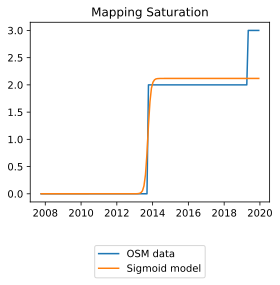

In [77]:
import json

import requests
from IPython.display import SVG, display

base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

bpolys = {
    "type": "Feature",
    "geometry": {
      "type": "Polygon",
      "coordinates": [
        [
          [34.40503165,-4.2800038],
          [34.4226,-4.2800038],
          [34.4226,-4.2698],
          [34.40503165,-4.2698],
          [34.40503165,-4.2800038]
        ]
      ]
    }
}

layer = {
    "name": "",
    "description": "",
    "data": {
          "result":result
          }
}    

parameters = {
  "name": "MappingSaturation",
  "bpolys": bpolys,
  "layer": layer,
  "includeSvg": True,
  "includeHtml": False,
  "flatten": False
}

response = requests.post(url, json=parameters)

response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200
#print(response.json())

properties = response.json()["properties"]
result = properties["result"]
svg = result.pop("svg")

#print("Properties: ")
#print(properties)

print("Analysis of quality to the date before AI started (the end of 2019).")
print("Result: ")
print(json.dumps(result, indent=4))  # Pretty print response

display(SVG(svg))

<H3>analysis of quality to the present without AI buildings</H3>


In [78]:
import json

from datetime import datetime

import requests

base_url = "https://api.ohsome.org/v1"
#endpoint = "/elements/count"
#endpoint = "/elements/count/groupBy/boundary/groupBy/tag"
endpoint = "/elements/count/groupBy/tag"
url = base_url + endpoint

parameters = {
    #"bpolys": json.dumps(bpolys),  # pass GeoJSON as string.
    # OR:
    "bboxes": "34.40503165,-4.2800038,34.4226,-4.2698",
    "filter": "building=*", 
    "groupByKey": "source",
    "groupByValues": "microsoft/BuildingFootprints",
    "format": "json",
    "time": "/2023-04-01/P1M",
}

headers = {
    "accept": "application/json",
    "Content-Type": "application/x-www-form-urlencoded",
}

for value in parameters.values():
    assert value != "", "Please provide values for the parameters"
    
response = requests.post(url, data=parameters, headers=headers)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

print("Response:")
#print(json.dumps(response.json(), indent=4))  # Pretty print response

result = response.json()["groupByResult"]

Response:


Analysis of quality to the present without AI buildings
Result: 
{
    "description": "The saturation of the last 3 years is 0.0%.\nNo saturation identified (Saturation \u2264 30%).\n",
    "timestamp_oqt": "2023-04-26T15:36:50.039264+00:00",
    "timestamp_osm": "2023-03-08T00:00:00+00:00",
    "value": 3.399639918374983e-12,
    "label": "red",
    "class": 1
}


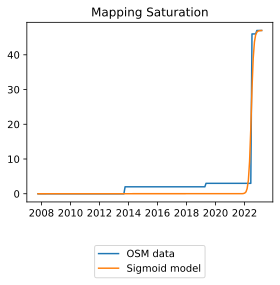

In [79]:
import json

import requests
from IPython.display import SVG, display

base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

bpolys = {
    "type": "Feature",
    "geometry": {
      "type": "Polygon",
      "coordinates": [
        [
          [34.40503165,-4.2800038],
          [34.4226,-4.2800038],
          [34.4226,-4.2698],
          [34.40503165,-4.2698],
          [34.40503165,-4.2800038]
        ]
      ]
    }
}


layer = {
    "name": "",
    "description": "",
    "data": {
          
    "result": [
                {
                    "timestamp": "2007-10-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2007-11-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2007-12-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2008-01-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2008-02-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2008-03-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2008-04-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2008-05-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2008-06-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2008-07-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2008-08-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2008-09-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2008-10-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2008-11-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2008-12-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2009-01-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2009-02-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2009-03-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2009-04-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2009-05-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2009-06-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2009-07-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2009-08-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2009-09-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2009-10-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2009-11-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2009-12-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2010-01-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2010-02-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2010-03-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2010-04-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2010-05-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2010-06-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2010-07-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2010-08-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2010-09-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2010-10-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2010-11-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2010-12-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2011-01-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2011-02-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2011-03-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2011-04-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2011-05-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2011-06-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2011-07-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2011-08-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2011-09-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2011-10-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2011-11-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2011-12-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2012-01-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2012-02-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2012-03-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2012-04-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2012-05-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2012-06-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2012-07-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2012-08-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2012-09-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2012-10-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2012-11-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2012-12-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2013-01-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2013-02-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2013-03-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2013-04-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2013-05-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2013-06-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2013-07-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2013-08-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2013-09-08T00:00:00Z",
                    "value": 0.0
                },
                {
                    "timestamp": "2013-10-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2013-11-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2013-12-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2014-01-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2014-02-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2014-03-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2014-04-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2014-05-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2014-06-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2014-07-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2014-08-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2014-09-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2014-10-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2014-11-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2014-12-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2015-01-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2015-02-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2015-03-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2015-04-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2015-05-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2015-06-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2015-07-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2015-08-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2015-09-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2015-10-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2015-11-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2015-12-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2016-01-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2016-02-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2016-03-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2016-04-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2016-05-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2016-06-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2016-07-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2016-08-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2016-09-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2016-10-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2016-11-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2016-12-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2017-01-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2017-02-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2017-03-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2017-04-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2017-05-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2017-06-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2017-07-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2017-08-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2017-09-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2017-10-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2017-11-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2017-12-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2018-01-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2018-02-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2018-03-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2018-04-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2018-05-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2018-06-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2018-07-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2018-08-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2018-09-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2018-10-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2018-11-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2018-12-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2019-01-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2019-02-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2019-03-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2019-04-08T00:00:00Z",
                    "value": 2.0
                },
                {
                    "timestamp": "2019-05-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2019-06-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2019-07-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2019-08-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2019-09-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2019-10-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2019-11-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2019-12-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2020-01-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2020-02-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2020-03-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2020-04-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2020-05-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2020-06-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2020-07-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2020-08-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2020-09-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2020-10-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2020-11-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2020-12-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2021-01-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2021-02-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2021-03-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2021-04-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2021-05-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2021-06-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2021-07-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2021-08-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2021-09-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2021-10-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2021-11-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2021-12-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2022-01-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2022-02-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2022-03-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2022-04-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2022-05-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2022-06-08T00:00:00Z",
                    "value": 3.0
                },
                {
                    "timestamp": "2022-07-08T00:00:00Z",
                    "value": 46.0
                },
                {
                    "timestamp": "2022-08-08T00:00:00Z",
                    "value": 46.0
                },
                {
                    "timestamp": "2022-09-08T00:00:00Z",
                    "value": 46.0
                },
                {
                    "timestamp": "2022-10-08T00:00:00Z",
                    "value": 46.0
                },
                {
                    "timestamp": "2022-11-08T00:00:00Z",
                    "value": 47.0
                },
                {
                    "timestamp": "2022-12-08T00:00:00Z",
                    "value": 47.0
                },
                {
                    "timestamp": "2023-01-08T00:00:00Z",
                    "value": 47.0
                },
                {
                    "timestamp": "2023-02-08T00:00:00Z",
                    "value": 47.0
                },
                {
                    "timestamp": "2023-03-08T00:00:00Z",
                    "value": 47.0
                }
    ]

    }
}    

parameters = {
  "name": "MappingSaturation",
  "bpolys": bpolys,
  "layer": layer,
  "includeSvg": True,
  "includeHtml": False,
  "flatten": False
}

response = requests.post(url, json=parameters)

response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200
#print(response.json())

properties = response.json()["properties"]
result = properties["result"]
svg = result.pop("svg")

#print("Properties: ")
#print(properties)

print("Analysis of quality to the present without AI buildings")
print("Result: ")
print(json.dumps(result, indent=4))  # Pretty print response

display(SVG(svg))

<H3>analysis of quality to the present including AI buildings</H3>


Analysis of quality to the present including AI buildings
Result: 
{
    "description": "The saturation of the last 3 years is 0.0%.\nNo saturation identified (Saturation \u2264 30%).\n",
    "timestamp_oqt": "2023-04-26T15:36:50.039264+00:00",
    "timestamp_osm": "2023-04-01T00:00:00+00:00",
    "value": 8.575624585474636e-12,
    "label": "red",
    "class": 1
}


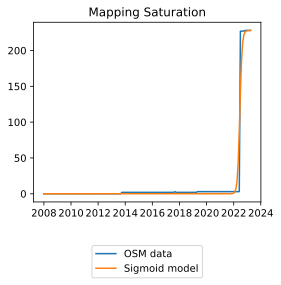

In [80]:
import json

import requests
from IPython.display import SVG, display

base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

bpolys = {
    "type": "Feature",
    "geometry": {
      "type": "Polygon",
      "coordinates": [
        [
          [34.40503165,-4.2800038],
          [34.4226,-4.2800038],
          [34.4226,-4.2698],
          [34.40503165,-4.2698],
          [34.40503165,-4.2800038]
        ]
      ]
    }
}

parameters = {
  "name": "MappingSaturation",
  "bpolys": bpolys,
  "layerKey": "building_count",
  "includeSvg": True,
  "includeHtml": False,
  "flatten": False
}

response = requests.post(url, json=parameters)

response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200
#print(response.json())

properties = response.json()["properties"]
result = properties["result"]
svg = result.pop("svg")

#print("Properties: ")
#print(properties)
#print("")
print("Analysis of quality to the present including AI buildings")
print("Result: ")
print(json.dumps(result, indent=4))  # Pretty print response

display(SVG(svg))